In [2]:
import torch
import torch.nn as nn

In [3]:
integer = torch.tensor(1234)
decimal = torch.tensor(3.14159265359)

print(f"`integer` is a {integer.ndim}-d Tensor: {integer}")
print(f"`decimal` is a {decimal.ndim}-d Tensor: {decimal}")

`integer` is a 0-d Tensor: 1234
`decimal` is a 0-d Tensor: 3.1415927410125732


In [4]:
fibonacci = torch.tensor([1, 1, 2, 3, 5, 8])
count_to_100 = torch.tensor(range(100))

print(f"`fibonacci` is a {fibonacci.ndim}-d Tensor with shape: {fibonacci.shape}")
print(f"`count_to_100` is a {count_to_100.ndim}-d Tensor with shape: {count_to_100.shape}")

`fibonacci` is a 1-d Tensor with shape: torch.Size([6])
`count_to_100` is a 1-d Tensor with shape: torch.Size([100])


In [5]:
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor'''
matrix = torch.tensor([[1,2,3],[4,5,6]])

assert isinstance(matrix, torch.Tensor), "matrix must be a torch Tensor object"
assert matrix.ndim == 2

'''TODO: Define a 4-d Tensor.'''
# Use torch.zeros to initialize a 4-d Tensor of zeros with size 10 x 3 x 256 x 256.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = torch.zeros(10,3,256,256)

assert isinstance(images, torch.Tensor), "images must be a torch Tensor object"
assert images.ndim == 4, "images must have 4 dimensions"
assert images.shape == (10, 3, 256, 256), "images is incorrect shape"
print(f"images is a {images.ndim}-d Tensor with shape: {images.shape}")

images is a 4-d Tensor with shape: torch.Size([10, 3, 256, 256])


In [6]:
row_vector = matrix[1]
column_vector = matrix[:, 1]
scalar = matrix[0, 1]

print(f"`row_vector`: {row_vector}")
print(f"`column_vector`: {column_vector}")
print(f"`scalar`: {scalar}")

`row_vector`: tensor([4, 5, 6])
`column_vector`: tensor([2, 5])
`scalar`: 2


In [7]:
import tensorflow as tf
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

/home/sunny/.cache/pypoetry/virtualenvs/deeplearning-exp-6CQtrg-v-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


I0000 00:00:1749089163.410607    8080 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21458 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9


In [9]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [10]:
'''TODO: Define a 2-d Tensor'''
matrix = tf.constant([[1,2,3],[4,5,6]], tf.float64)

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [11]:
'''TODO: Define a 4-d Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = tf.zeros([10,256,256,3])

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

In [12]:
tf.shape(images)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 10, 256, 256,   3], dtype=int32)>

In [13]:

### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  return e

In [14]:

# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)
     

tf.Tensor(6.0, shape=(), dtype=float32)


In [15]:
class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight(name="weight", shape=(d, self.n_output_nodes)) # note the dimensionality
    self.b = self.add_weight(name="bias", shape=(1, self.n_output_nodes)) # note the dimensionality

  def call(self, x):
    z = tf.add(tf.matmul(x, self.W), self.b)
    y = tf.sigmoid(z)
    return y

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.keras.utils.set_random_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.27064407 0.1826951  0.50374055]]
[PASS] test_custom_dense_layer_output


True

In [16]:
### Defining a neural network using the Sequential API ###

# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define the model
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :)
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = Dense(3, activation='sigmoid')

# Add the dense layer to the model
model.add(dense_layer)
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(10000, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))


In [17]:
# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''

model_output = model(x_input)
print(model_output)

tf.Tensor(
[[0.71328634 0.50334024 0.40861192 0.2569439  0.6848273  0.3694506
  0.78941643 0.498357   0.17271729 0.34324116]], shape=(1, 10), dtype=float32)


In [28]:
### Defining a model using subclassing ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

  # In __init__, we define the Model's layers
  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = Dense(n_output_nodes, activation='sigmoid')

  # In the call function, we define the Model's forward pass.
  def call(self, inputs, isidentity=False):
    if isidentity: # TODO
      return inputs # TODO
    return self.dense_layer(inputs)

In [29]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[0.14197895 0.7171195  0.58792543]], shape=(1, 3), dtype=float32)


In [30]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))
'''TODO: pass the input into the model and call with and without the input identity option.'''
print(x_input)
out_activate = model(x_input)
out_identity = model(x_input,isidentity=True)

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))
     

tf.Tensor([[1. 2.]], shape=(1, 2), dtype=float32)
Network output with activation: [[0.24416967 0.583687   0.4334448 ]]; network identity output: [[1. 2.]]


In [31]:
# DIfferetiation

In [37]:
### Gradient computation with GradientTape ###

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 27.0

Initializing x=[[-1.1012201]]


Text(0, 0.5, 'x value')

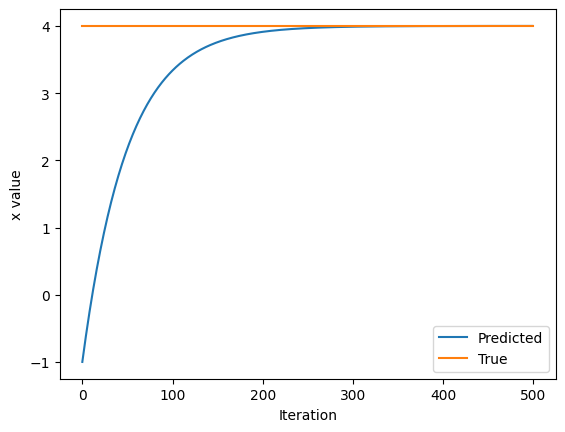

In [39]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = (x_f - x) ** 2

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')